## Descargue las bases de datos

In [13]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [15]:
players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [16]:
recent_seasons = [21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
                  21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
                  21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
                  21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
                  31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
                  42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003, 32003]

games_filtered_seasons = games_df[games_df['season_id'].isin(recent_seasons)]
games_filtered_seasons.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
18174,21984,1610612765,DET,Detroit Pistons,28400003,1984-10-26 00:00:00,DET vs. BOS,L,240,48.0,...,59.0,34.0,NaN,NaN,NaN,26.0,130.0,7,0,Regular Season
18175,21984,1610612744,GOS,Golden State Warriors,28400006,1984-10-26 00:00:00,GOS vs. PHX,L,240,42.0,...,37.0,32.0,NaN,NaN,NaN,33.0,122.0,8,0,Regular Season
18176,21984,1610612751,NJN,New Jersey Nets,28400004,1984-10-26 00:00:00,NJN vs. ATL,L,240,40.0,...,42.0,21.0,NaN,NaN,NaN,28.0,119.0,15,0,Regular Season
18177,21984,1610612760,SEA,Seattle SuperSonics,28400001,1984-10-26 00:00:00,SEA vs. UTH,W,240,36.0,...,31.0,12.0,NaN,NaN,NaN,29.0,94.0,-8,0,Regular Season
18178,21984,1610612741,CHI,Chicago Bulls,28400005,1984-10-26 00:00:00,CHI vs. WAS,W,240,48.0,...,46.0,24.0,NaN,NaN,NaN,21.0,93.0,-16,0,Regular Season


Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [17]:
games_playoffs = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']
len(games_playoffs)

1161

Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [18]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='left')

In [34]:
player_game_stats = pd.merge(players_combined, games_playoffs, left_on='team_id', right_on='team_id_home',how='left')
player_game_stats.head(10)

,person_id,first_name_x,last_name_x,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type,total_points
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,22.0,4.0,2.0,16.0,23.0,109.0,-13.0,0.0,Playoffs,231.0
1,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,24.0,4.0,1.0,17.0,27.0,113.0,-2.0,0.0,Playoffs,228.0
2,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,33.0,4.0,6.0,17.0,28.0,130.0,4.0,0.0,Playoffs,256.0
3,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,24.0,10.0,7.0,28.0,26.0,107.0,-8.0,0.0,Playoffs,222.0
4,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,21.0,5.0,4.0,13.0,21.0,115.0,11.0,0.0,Playoffs,219.0
5,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,22.0,4.0,3.0,15.0,24.0,116.0,4.0,0.0,Playoffs,228.0
6,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,36.0,13.0,12.0,14.0,27.0,125.0,10.0,0.0,Playoffs,240.0
7,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,23.0,5.0,3.0,24.0,26.0,98.0,-13.0,0.0,Playoffs,209.0
8,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,26.0,5.0,4.0,17.0,23.0,96.0,-12.0,0.0,Playoffs,204.0
9,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,27.0,6.0,9.0,26.0,27.0,114.0,9.0,0.0,Playoffs,219.0


##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [19]:
games_playoffs['team_name_home'].nunique()

30

2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [20]:
players_combined['person_id'].nunique()

4171

* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

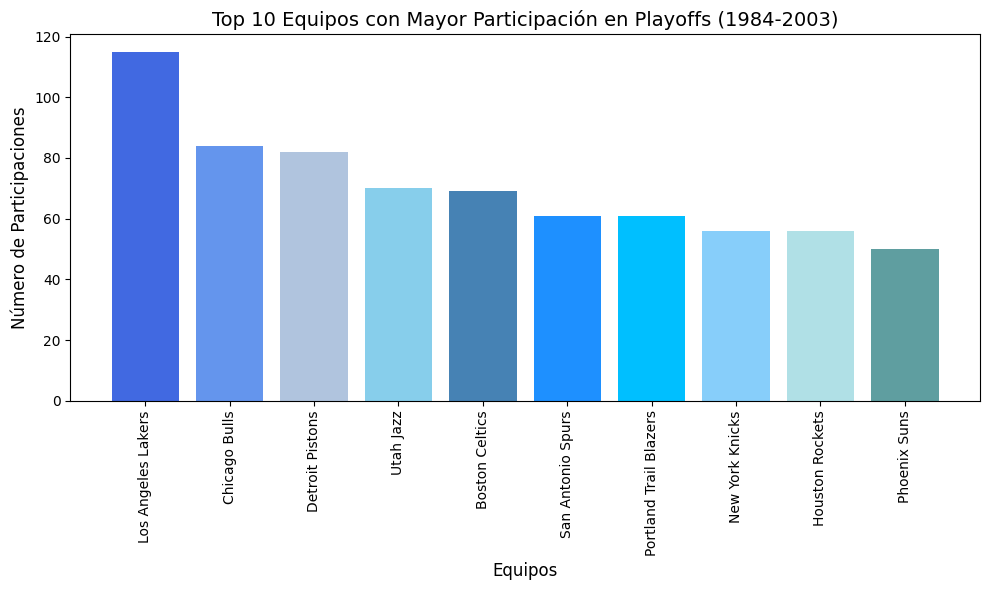

In [21]:
team_counts = games_playoffs['team_name_home'].value_counts()

top_10_teams = team_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_teams.index, top_10_teams.values, color=['royalblue', 'cornflowerblue', 'lightsteelblue', 'skyblue', 'steelblue', 'dodgerblue', 'deepskyblue', 'lightskyblue', 'powderblue', 'cadetblue'])
plt.xlabel('Equipos', fontsize=12)
plt.ylabel('Número de Participaciones', fontsize=12)
plt.title('Top 10 Equipos con Mayor Participación en Playoffs (1984-2003)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

<ipython-input-22-6d71bf6fcabf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_points.index, y=team_points.values, palette="Blues_r")


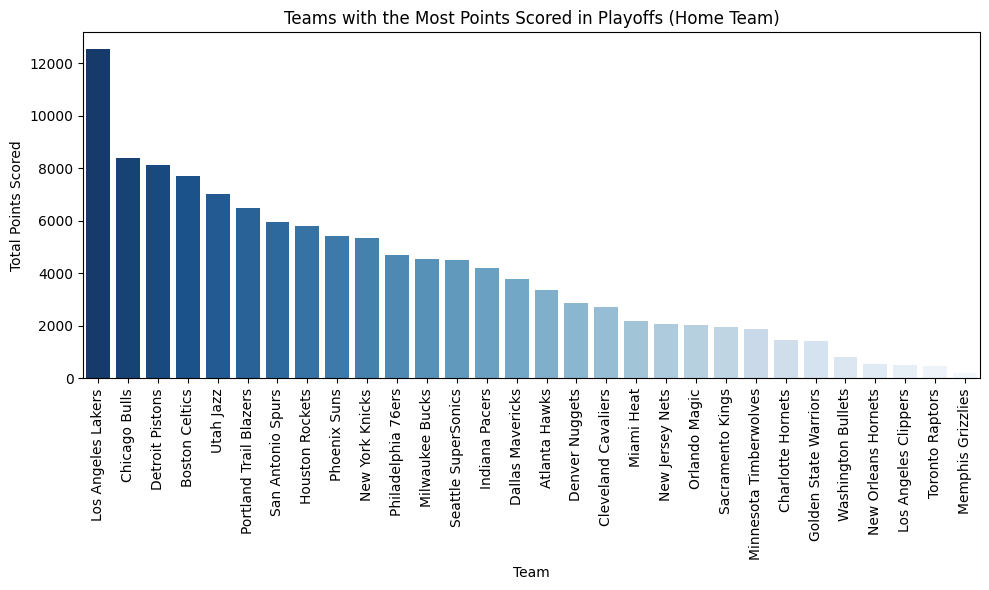

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

team_points = games_playoffs.groupby('team_name_home')['pts_home'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=team_points.index, y=team_points.values, palette="Blues_r")
plt.title('Teams with the Most Points Scored in Playoffs (Home Team)')
plt.xlabel('Team')
plt.ylabel('Total Points Scored')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

In [23]:
games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

,pts_home
team_name_home,
Denver Nuggets,115.200000
Boston Celtics,111.623188
Golden State Warriors,110.000000
Los Angeles Lakers,109.165217
Phoenix Suns,108.700000
Dallas Mavericks,108.200000
Portland Trail Blazers,106.491803
Milwaukee Bucks,105.720930
Seattle SuperSonics,104.813953


Hga un grafico en naranja de estos resultados

<ipython-input-24-d43fa139d7c8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_points.index, y=team_avg_points.values, palette="Oranges_r")


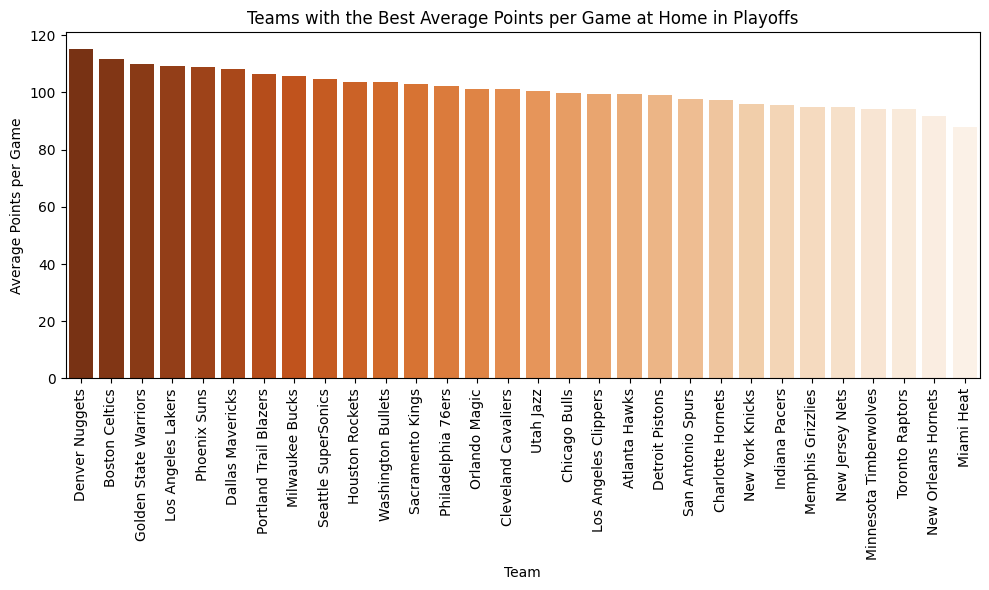

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

team_avg_points = games_playoffs.groupby('team_name_home')['pts_home'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=team_avg_points.index, y=team_avg_points.values, palette="Oranges_r")
plt.title('Teams with the Best Average Points per Game at Home in Playoffs')
plt.xlabel('Team')
plt.ylabel('Average Points per Game')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs

1.   Elemento de la lista
2.   Elemento de la lista


Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [25]:
games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']
season_total_points = games_playoffs.groupby('season_id')['total_points'].sum()
season_total_points.head(10).sort_values(ascending=False)

<ipython-input-25-ca6d1e8d958b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_playoffs['total_points'] = games_playoffs['pts_home'] + games_playoffs['pts_away']


,total_points
season_id,
41987,16691.0
41986,15678.0
41984,15598.0
41989,15195.0
41992,15127.0
41991,15075.0
41985,15057.0
41994,14492.0
41990,14165.0


* Cree una serie de tiempo con esto:

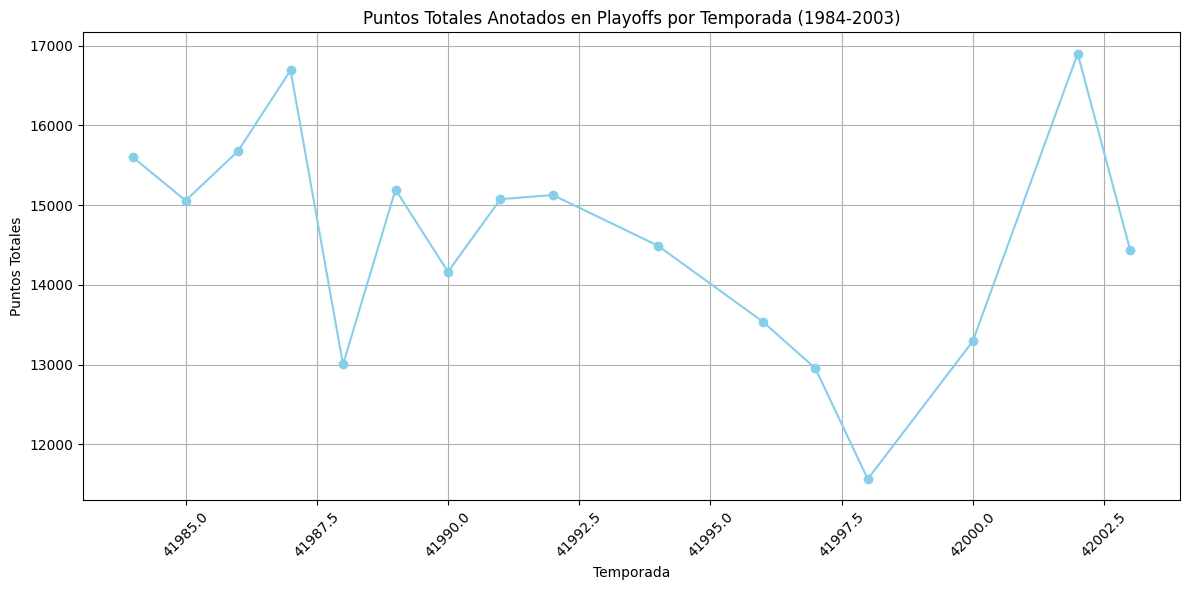

In [26]:
plt.figure(figsize=(12, 6))
season_total_points.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.title('Puntos Totales Anotados en Playoffs por Temporada (1984-2003)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* Hay algun dato interesante en esta graficaa

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [49]:
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'})

pivot_table_roles = pd.pivot_table(player_game_stats,values= 'pts_home', index='team_name_home', columns='role', aggfunc='mean')
pivot_table_roles

role,Ala,Base,Pivote
team_name_home,,,
Atlanta Hawks,99.382353,99.382353,99.382353
Boston Celtics,111.623188,111.623188,111.623188
Charlotte Hornets,97.466667,97.466667,97.466667
Chicago Bulls,99.904762,99.904762,99.904762
Cleveland Cavaliers,101.000000,101.000000,101.000000
Dallas Mavericks,NaN,108.200000,108.200000
Denver Nuggets,115.200000,115.200000,115.200000
Detroit Pistons,99.109756,99.109756,99.109756
Golden State Warriors,110.000000,110.000000,110.000000


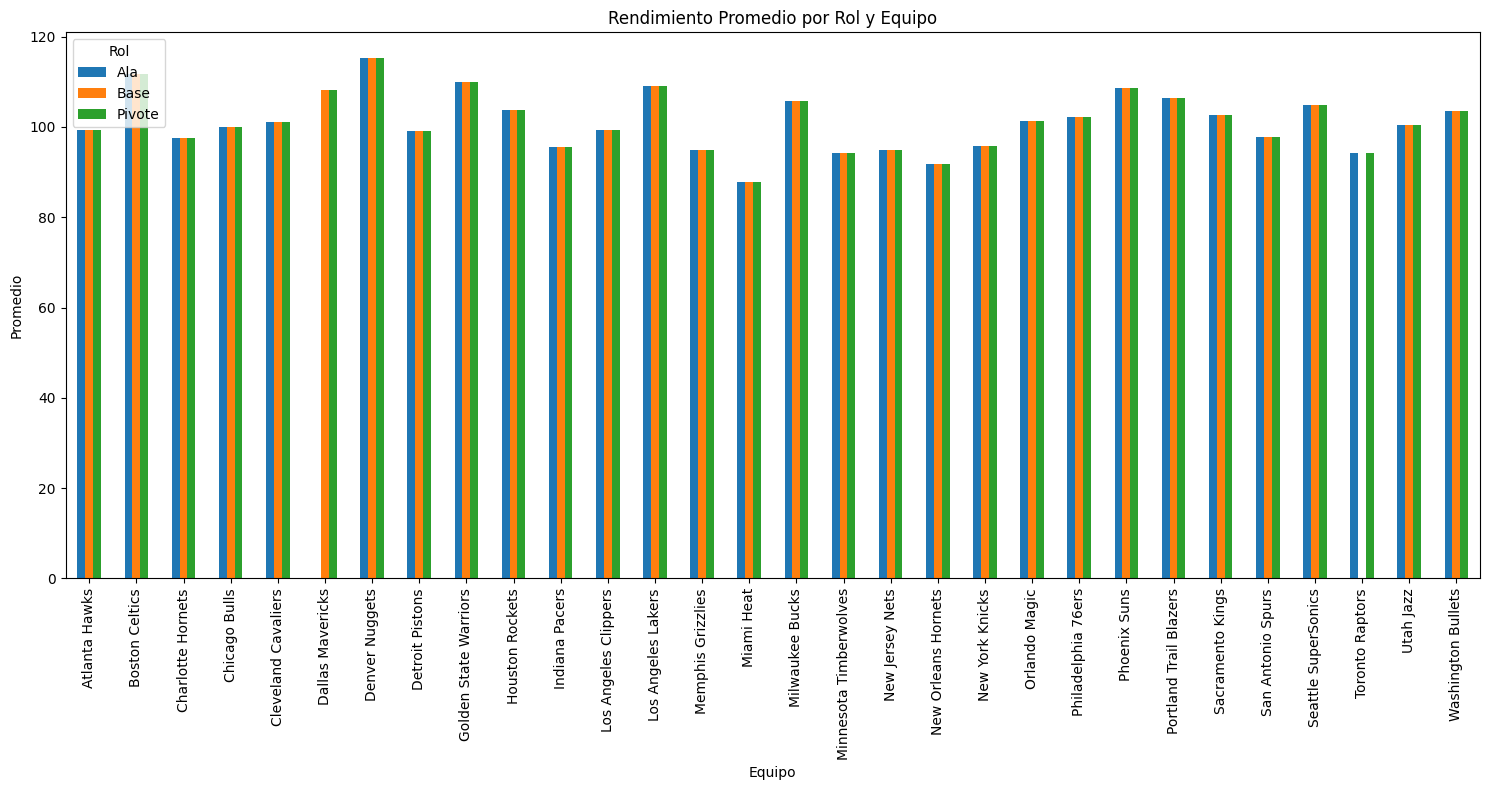

In [50]:
pivot_table_roles.plot(kind='bar', figsize=(15, 8))
plt.title('Rendimiento Promedio por Rol y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Promedio')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [55]:
crosstab_result = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
crosstab_result

wl_home,L,W
position_y,,
C,546,1055
C-PF,170,271
PF,1192,2321
PF-C,341,699
PF-SF,136,270
PG,1160,2362
PG-SG,243,554
SF,860,1600
SF-PF,256,459


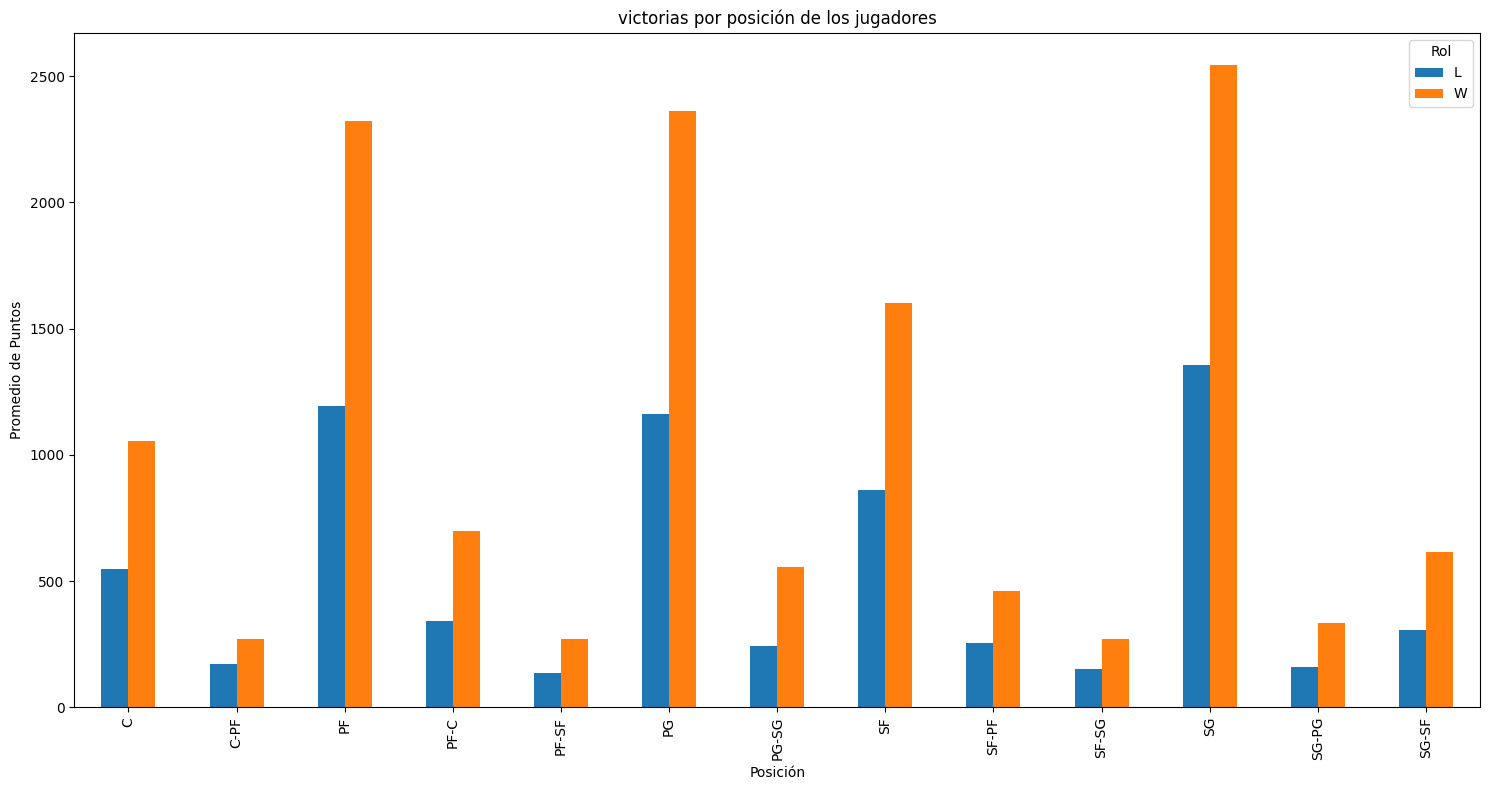

In [56]:
crosstab_result.plot(kind='bar', figsize=(15, 8))
plt.title('victorias por posición de los jugadores')
plt.xlabel('Posición')
plt.ylabel('Promedio de Puntos')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

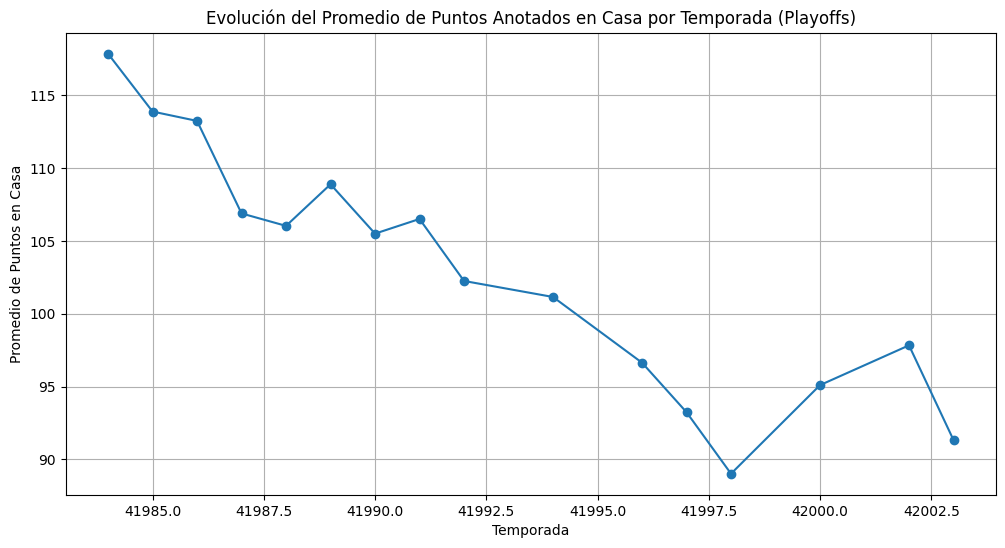

In [29]:
avg_pts_home_by_season = games_playoffs.groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_pts_home_by_season.index, avg_pts_home_by_season.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title('Evolución del Promedio de Puntos Anotados en Casa por Temporada (Playoffs)')
plt.grid(True)
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

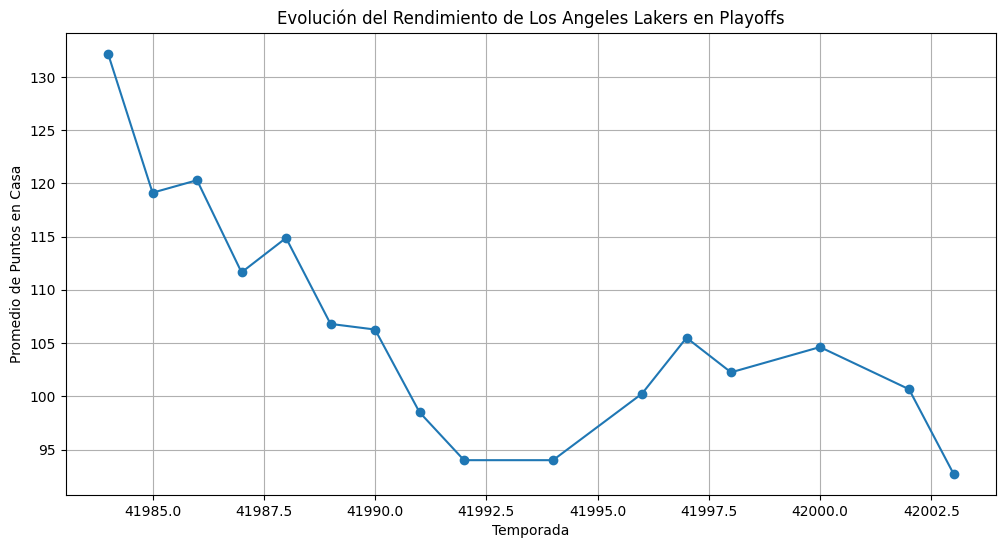

In [31]:
team_total_points = games_playoffs.groupby('team_name_home')['pts_home'].sum()
best_team = team_total_points.idxmax()

best_team_performance = games_playoffs[games_playoffs['team_name_home'] == best_team].groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(best_team_performance.index, best_team_performance.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento de {best_team} en Playoffs')
plt.grid(True)
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [43]:
player_total_points = player_game_stats.groupby('player_id')['pts_home'].sum()

best_player_id = player_total_points.idxmax()

print(f"El jugador con más puntos anotados en los Playoffs es el jugador con ID: {best_player_id}")

El jugador con más puntos anotados en los Playoffs es el jugador con ID: 1628959.0


In [38]:
players_df[players_df['person_id'] == 1628959][['first_name', 'last_name']]

,first_name,last_name
50,Rawle,Alkins


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

El jugador con más puntos anotados en los Playoffs es el jugador con ID: 1628959.0


NameError: name 'player_with_most_points_name' is not defined

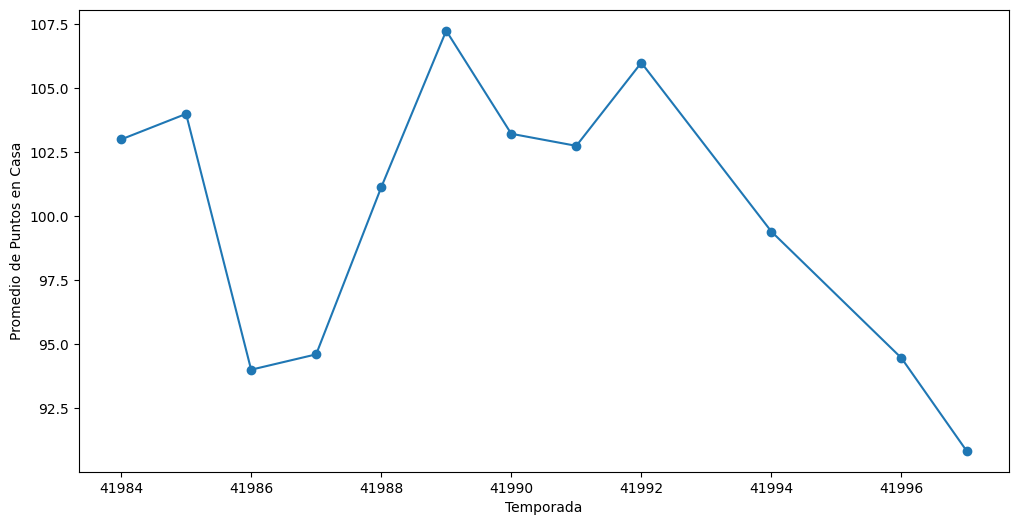

In [64]:
player_total_points = player_game_stats.groupby('player_id')['pts_home'].sum()

best_player_id = player_total_points.idxmax()

player_with_most_points_id = best_player_id

print(f"El jugador con más puntos anotados en los Playoffs es el jugador con ID: {best_player_id}")

import matplotlib.pyplot as plt

player_performance = player_game_stats[player_game_stats['person_id'] == player_with_most_points_id].groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(player_performance.index, player_performance.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title(f'Evolución del Rendimiento del Mejor Jugador: {player_with_most_points_name[0]} {player_with_most_points_name[1]}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

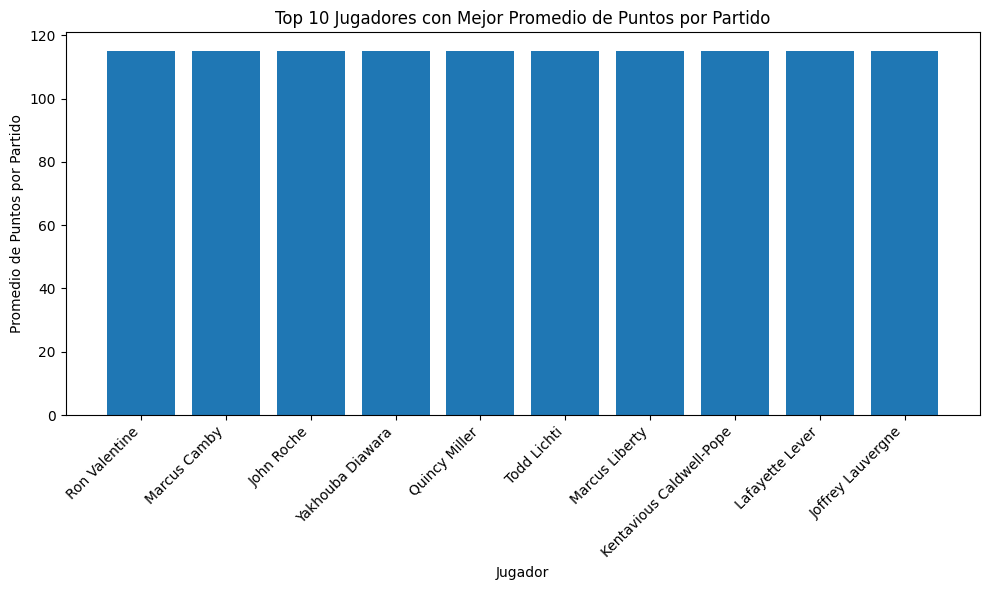

In [62]:
player_avg_points = player_game_stats.groupby('person_id')['pts_home'].mean()

top_players = player_avg_points.sort_values(ascending=False)

top_10_players = top_players.head(10)

player_names = []
for player_id in top_10_players.index:
  player_name = players_df[players_df['person_id'] == player_id][['first_name', 'last_name']].values
  if len(player_name) > 0:
    player_names.append(f"{player_name[0][0]} {player_name[0][1]}")
  else:
    player_names.append("Unknown")

plt.figure(figsize=(10, 6))
plt.bar(player_names, top_10_players.values)
plt.xlabel('Jugador')
plt.ylabel('Promedio de Puntos por Partido')
plt.title('Top 10 Jugadores con Mejor Promedio de Puntos por Partido')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

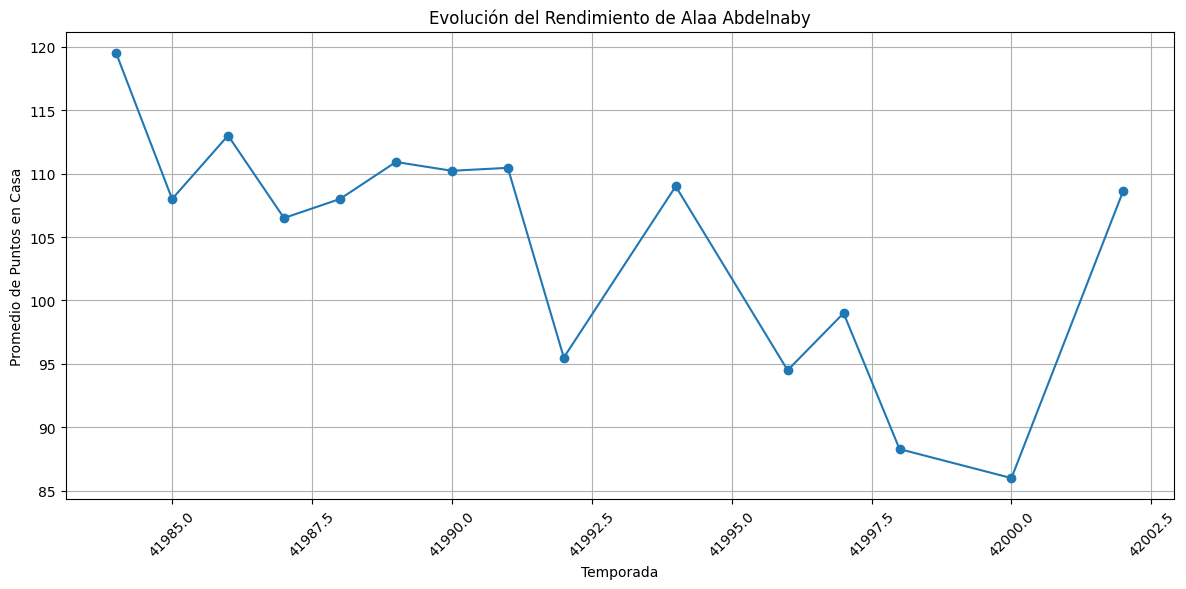

In [63]:
player_id_to_analyze = 76001

player_performance = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze].groupby('season_id')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(player_performance.index, player_performance.values, marker='o')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')

player_name = players_df[players_df['person_id'] == player_id_to_analyze][['first_name', 'last_name']].values
if len(player_name) > 0:
  plt.title(f'Evolución del Rendimiento de {player_name[0][0]} {player_name[0][1]}')
else:
  plt.title(f'Evolución del Rendimiento del Jugador (ID: {player_id_to_analyze})')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

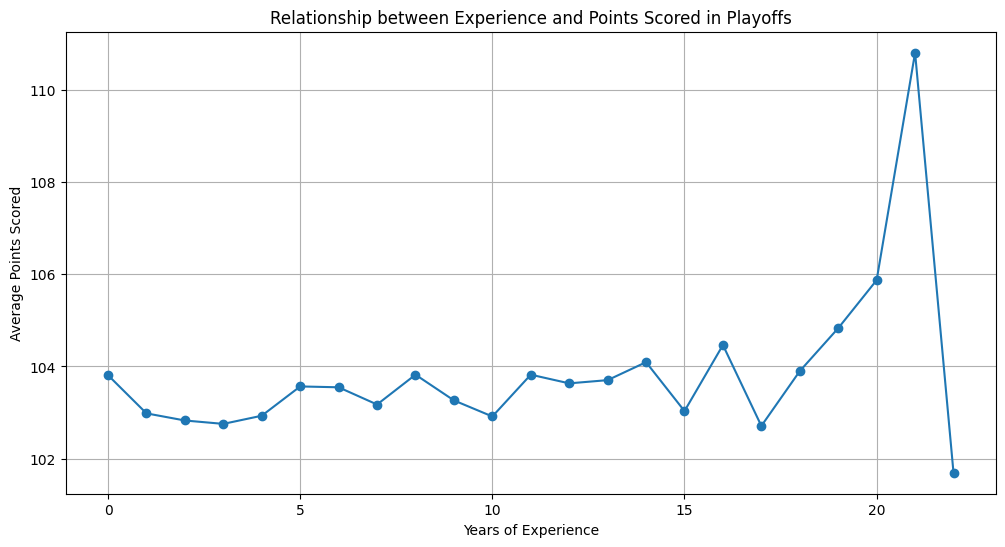

In [47]:
experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()

plt.figure(figsize=(12, 6))
plt.plot(experience_points.index, experience_points.values, marker='o', linestyle='-')
plt.xlabel('Years of Experience')
plt.ylabel('Average Points Scored')
plt.title('Relationship between Experience and Points Scored in Playoffs')
plt.grid(True)
plt.show()

* Juagador es:

Rawle	Alkins

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

El desempeño del equipo más destacado a lo largo del tiempo está determinado por una combinación de elementos que incluyen a los jugadores, la estrategia del equipo, factores externos y las normas del juego.

2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

El jugador más destacado mantiene un rendimiento consistente, aunque con variaciones que afectan los playoffs en algunos años. Como entrenador, observaría su desempeño, ajustaría los entrenamientos, controlaría su carga de trabajo, lo motivaría y adaptaría las tácticas del equipo a sus habilidades para sostener o mejorar su rendimiento.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

Las posiciones de los jugadores son clave para el éxito en los Playoffs, ya que cada una aporta habilidades específicas. Algunas posiciones, como el base en baloncesto o el centrocampista en fútbol, son cruciales porque controlan el ritmo del juego y facilitan las estrategias del equipo. Aunque todas las posiciones importan, quienes manejan el balón y lideran el juego suelen ser determinantes en los momentos decisivos.